<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/sanghunoh/reports/Term_2_CNN_MPIE_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Connect Drive

In [ ]:
path_root = '/content/drive/MyDrive/datas/'

# 작업 경로 설정
import os
os.chdir(path_root)
!pwd

/content/drive/MyDrive/Colab Notebooks/00.study/10.knou/datas


###Load Dataset

In [ ]:
path = path_root + 'mpie_30_shuffle/'

def loadDatasetFromCSV(_datafilename, _labelfilename, label_column):
  _train_feature_csv = pd.read_csv(path + _datafilename, dtype=np.float32, header=None) # image features of train data
  _train_feature_flatten = _train_feature_csv.values.flatten()
  _train_feature_reshape = np.reshape(_train_feature_flatten, (_train_feature_csv.shape[0], 32,-1))

  _train_label_csv = pd.read_csv(path + _labelfilename, dtype=np.float32, header=None) # labels of train data
  _train_label = _train_label_csv[label_column] # get label you want

  return _train_feature_reshape, _train_label

In [ ]:
import pandas as pd
import numpy as np

# train
train_feature_reshape, train_label = loadDatasetFromCSV('Traindata.csv', 'Trainlabel.csv', 0)
# test
validation_feature_reshape, validation_label = loadDatasetFromCSV('Testdata.csv', 'Testlabel.csv', 0)

train_feature_reshape.shape, train_label.shape, validation_feature_reshape.shape, validation_label.shape

((18777, 32, 32), (18777,), (5086, 32, 32), (5086,))

In [ ]:
import tensorflow as tf

def preprocessDataset(features_reshape, labels, batch_size=64, shuffle_buffer_size=100):
  _batch_size = batch_size
  _shuffle_buffer_size = shuffle_buffer_size

  _features = features_reshape
  _labels = labels
  _dataset_tensors = tf.data.Dataset.from_tensor_slices((_features, _labels))

  if _shuffle_buffer_size == None:
    _dataset_tensors = _dataset_tensors.batch(_batch_size)
  else :
    _dataset_tensors = _dataset_tensors.shuffle(_shuffle_buffer_size).batch(_batch_size)

  return _dataset_tensors

In [ ]:
train_dataset = preprocessDataset(train_feature_reshape, train_label)

In [ ]:
# train_dataset?

In [ ]:
validation_dataset = preprocessDataset(validation_feature_reshape, validation_label, shuffle_buffer_size=None)

###Load Trained Model

In [ ]:
import pickle
with open('results.pickle', 'rb') as f:
  results = pickle.load(f)
results   # model, history, execution_time

[(<keras.engine.sequential.Sequential at 0x7faa540777d0>,
  163.59442591667175),
 (<keras.engine.sequential.Sequential at 0x7faa4f856d90>,
  148.51638078689575),
 (<keras.engine.sequential.Sequential at 0x7faa4f771450>,
  203.6242094039917)]

## show model

In [ ]:
def drawModel(index, model, savefile=True):
  tf.keras.utils.plot_model(model, to_file=f'model_{index}.png', show_shapes=True, show_dtype=True, expand_nested=True, show_layer_activations=True, ) #layer_range=?, 

model = results[0][0]
drawModel(None, model)

###drawing history model

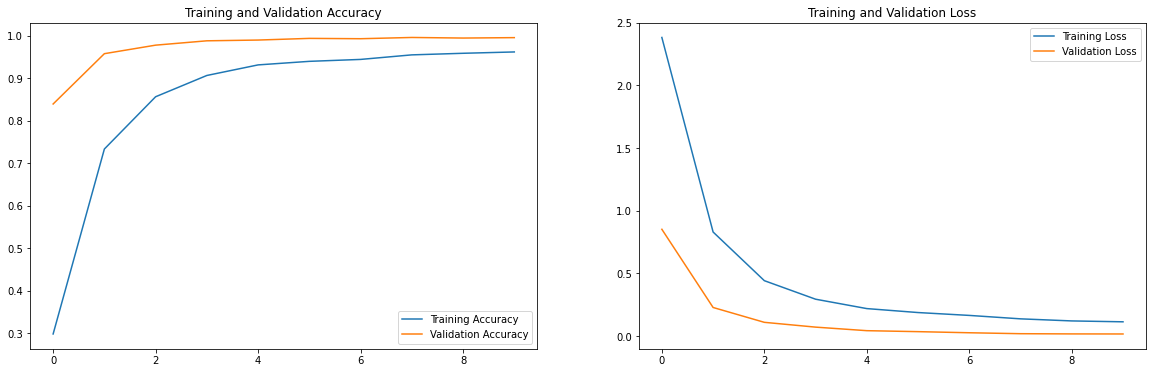

In [ ]:
import matplotlib.pyplot as plt

def drawModelHistory(index, history, training_time, filesave=True):
  _epochs = history.params['epochs']
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(_epochs)
  # acc, list(epochs_range)

  plt.figure(figsize=(20, 6))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.savefig(f'history_{index}.png', bbox_inches='tight')
  plt.show()

history = results[0][1]
drawModelHistory(None, history, None)

Training Time : 163.594 sec


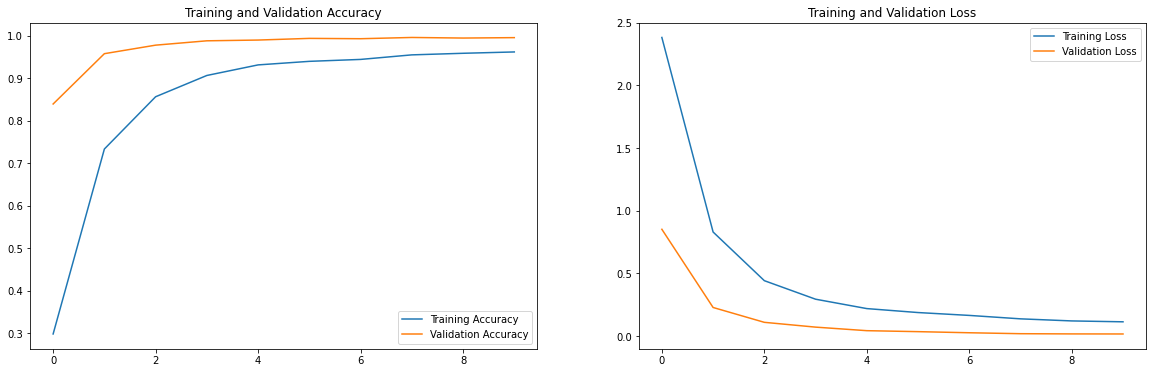

Training Time : 148.516 sec


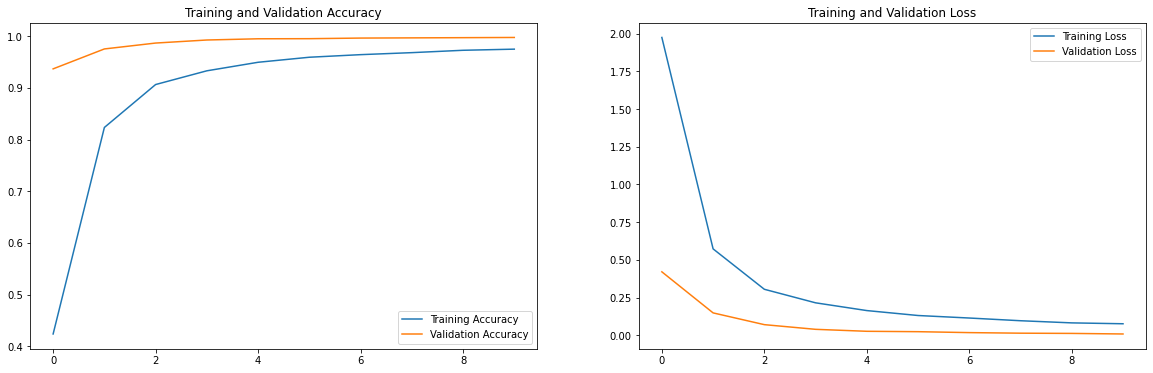

Training Time : 203.624 sec


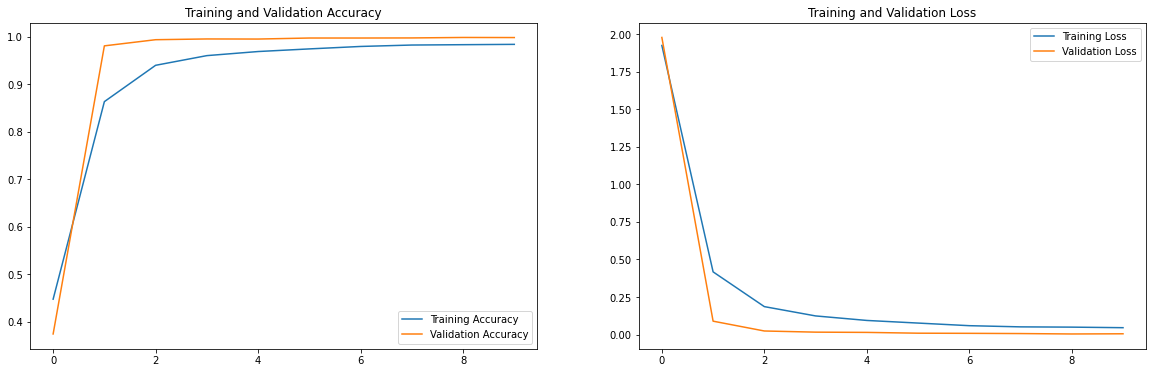

In [13]:
import tensorflow as tf
for idx, result in enumerate(results):
  model, history, training_time, param = result[0], result[1], result[2], result[3]
  print(f'Training Time : {training_time:.3f} sec')
  drawModel(idx, model)
  drawModelHistory(idx, history, training_time)
